# 데이터 불러오기

In [ ]:
df = pd.read_csv('data/텍스트유사도.csv')
ctr = pd.read_csv('data/의류/total_ctr.csv')

df = df.set_index('content_id')
ctr= ctr.set_index('content_id')
ctr = ctr.loc[df.index]

df_img = df[df.bg_rgb != '-1']
ctr_img = ctr.loc[df_img.index]

# Text

In [ ]:
col = '제목-키워드'
step = 4
for i in range(step):
    print(f'유사도 범위: {round(i/step,1)} ~ {round((i+1)/step,1)}')
    print(round(man2man1[(man2man1[col]>i/step) & (man2man1[col]<=(i+1)/step)].ctr.mean()*100, 2))

유사도 범위: 0.0 ~ 0.2
3.98
유사도 범위: 0.2 ~ 0.5
3.2
유사도 범위: 0.5 ~ 0.8
3.25
유사도 범위: 0.8 ~ 1.0
3.05


## 워드클라우드 시각화

### 필요 라이브러리 설치 및 import

In [ ]:
!pip show konlpy
!pip show wordcloud
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 데이터 불러오기

In [ ]:
key_ranking = pd.read_csv('data/키워드_랭킹.csv')

In [ ]:
key_ranking = key_ranking.fillna('')

In [ ]:
key_ranking[(key_ranking.cnt>10) & (key_ranking.ctr>0.03)]

,name,cnt,ctr
54,코스프레,329,0.034386
70,한복,261,0.039538
89,트렌치코트,224,0.030236
107,졸업사진,193,0.033168
110,남자팬티,190,0.031378
...,...,...,...
2185,기능성속옷,11,0.040170
2192,벨트코트,11,0.031059
2202,폭스퍼베스트,11,0.151298
2210,폭스베스트,11,0.087117


In [ ]:
keyword_cnt

,name,cnt,ctr
418,맨투맨,352,0.023376
598,스톤아일랜드,69,0.024032
211,나이키,58,0.024695
41,L,44,0.021353
607,스톤아일랜드맨투맨,38,0.019154
...,...,...,...
479,반팔,1,0.032788
75,arket,1,0.030191
481,발렌시아가니트,1,0.013384
482,발렌시아가맨투맨,1,0.013384


In [ ]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
fonts = [f for f in sys_font if 'Nanum' in f]

In [ ]:
keyword_cnt

,name,cnt,ctr
2407,코트,486,0.026605
848,롱코트,274,0.026671
2776,핸드메이드코트,172,0.023726
410,겨울코트,151,0.025823
2535,트렌치코트,149,0.027336
...,...,...,...
1114,문도,1,0.026773
1115,뮤즈에이치,1,0.009596
1116,뮤지엄,1,0.027966
1119,미뉴에트코트,1,0.007479


/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf


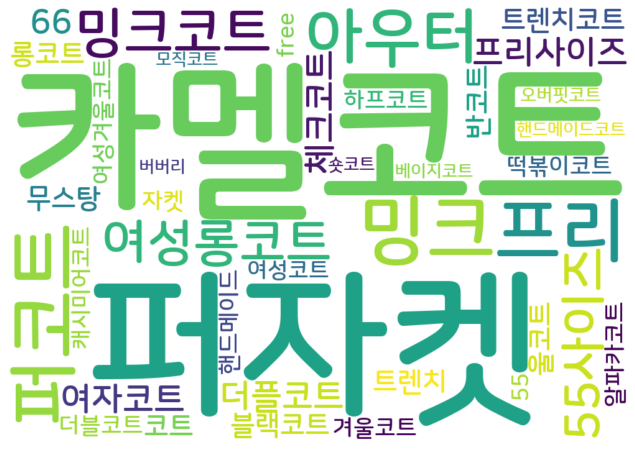

In [ ]:
countss = keyword_cnt[keyword_cnt.cnt>20]
wc_dict = dict(zip(countss.name, countss.ctr))
for font in fonts[3:4]:
    print(font)
    wc = WordCloud(font_path=font,
            background_color="white",
            width=1000,
            height=700,
            max_words=1000,
            max_font_size=300)

    cloud = wc.generate_from_frequencies(wc_dict)

    plt.figure(figsize=(13,8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
name_cnt = get_voca_cnt(man2man['제목'].apply(eval))
key_cnt = get_voca_cnt(man2man['키워드'].apply(eval))
des_cnt = get_voca_cnt(man2man['설명'].apply(eval))

total_vocab = pd.merge(name_cnt, key_cnt,how='outer', on='name').fillna(0)
total_vocab['cnt'] = (total_vocab['cnt_x'] + total_vocab['cnt_y']).astype(int)
total_vocab = total_vocab[['name', 'cnt']]
total_vocab

,name,cnt
0,맨투맨,980
1,사이즈,76
2,스톤아일랜드,133
3,나이키,104
4,정품,55
...,...,...
1486,반팔,1
1487,arket,1
1488,발렌시아가니트,1
1489,발렌시아가맨투맨,1


In [ ]:
man2man.keyword + man2man.content_name + man2man.description

content_id
100108434    m사이즈,스톤아일랜드,스톤아일랜드맨투맨스톤아일랜드 자수로고 와펜 맨투맨스톤아일랜드 ...
175858123    인사일런스,맨투맨인사일런스 맨투맨 (기자코튼) s사이즈 (95-100)최상급 원단인...
169834971    105,100나이젤카본/x반스 프린트 배색 맨투맨 / L나이젤카본/x반스 프린트 배...
135007685           리복,맨투맨,사이드로고,브랜드리복 사이드로고 맨투맨상태 좋음 \n총장71\n
174278219    아크네,아크네스튜디오,맨투맨아크네 스튜디오 맨투맨 S날씨좋을 때 입으면 정말 이쁜 ...
                                   ...                        
83752991     87mm,87mm컬렉션,87mm맨투맨,mmlg,헨리맨투맨87mm 컬렉션 맨투맨87m...
175705604    베이띵,베이프,베이프후드,ape,무신사정품 베이띵 에이프 베이프 긴팔 급처베이띵 에...
175586995    리복리복 브이넥 맨투맨오염하자 없고 상태 좋아요\n사이즈는 100정도 합니다\n쿨거...
175890424    오프화이트,나이키,톰브라운,구찌,루이비통새상품급 fw)겨울용 오프화이트 테이프 맨투...
172494769                                   xl몽클레어/맨투맨/xl새상품\n
Length: 784, dtype: object

In [ ]:
man2man.keyword = man2man.keyword.fillna('')
man2man.description = man2man.description.fillna('')
key_ctr_list = []
for i, name in tqdm(enumerate(total_vocab['name'])):
    key_ctr_list.append(man2man[(man2man.keyword + man2man.content_name + man2man.description).apply(lambda x: name in x)].ctr.mean())
total_vocab['ctr'] = key_ctr_list

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0it [00:00, ?it/s]

In [ ]:
total_vocab[total_vocab.cnt>10].sort_values('ctr', ascending=False)

,name,cnt,ctr
292,우영미,11,0.048177
659,시스템옴므,11,0.046693
60,준지,19,0.039054
17,롱슬리브,18,0.035119
25,스투시,23,0.034183
...,...,...,...
41,구찌,24,0.018305
38,라코스테,15,0.018298
47,몽클레어,20,0.018266
58,빈티지,15,0.017345


# 텍스트 유사도 - 원인 분석
- 학습 데이터의 텍스트들의 유사도를 계산 후 클릭 여부(label)과 비교

In [ ]:
train = pd.read_csv('data/train.csv')

In [ ]:
train_txt = train[['content_id', 'content_name', 'content_keyword', 'content_cat_1', 'content_cat_2', 'content_cat_3']].drop_duplicates()

In [ ]:
train_txt= train_txt.set_index('content_id')

In [ ]:
from gensim.models import FastText
import json
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import re
tqdm.pandas()

def brand_(name, brand_dict):
    for key in brand_dict.keys():
        for value in brand_dict[key]:
            if value in name.split(' '):
                name = name.replace(value, key)
    return name

def re_kor_brand(s):
    s = brand_(s, brand_dict)
    pre = re.compile('[^ 가-힣]')
    result = pre.sub(' ', s) 
    while '  ' in result:
        result = result.replace('  ', ' ')
    result = result.split(' ')
    result = [r for r in result if r!='']
    return result

def get_voca_cnt(voca_list):
    total_vocabs = []
    for t in voca_list:
        total_vocabs.extend(t)
    total_unique, total_count = np.unique(total_vocabs, return_counts=True)
    vocab_cnt = pd.DataFrame({'name': total_unique, 'cnt': total_count})
    return vocab_cnt.sort_values('cnt', ascending=False)

def text_preprocess(df):
    name_list = df.content_name.apply(re_kor_brand)
    name_cnt = get_voca_cnt(name_list)
    keyword_list = df.content_keyword.fillna('').apply(lambda x: x.split(','))
    keyword_cnt = get_voca_cnt(keyword_list)

    total_vocab = pd.merge(name_cnt, keyword_cnt,how='outer', on='name').fillna(0)
    total_vocab['cnt'] = (total_vocab['cnt_x'] + total_vocab['cnt_y']).astype(int)
    total_vocab = total_vocab[['name', 'cnt']]

    total_vocab = total_vocab[total_vocab.cnt>2]

    cat_list1 = df.content_cat_1.apply(lambda x: [cat.replace('기타', 'etc').replace(' ', '') for cat in x.split('/')])
    cat_list2 = df.content_cat_2.apply(lambda x: cat_num2name[str(x)]).apply(lambda x: x.replace('/', ' ')).apply(lambda x: cat_dict[x] if x in cat_dict.keys() else x).apply(lambda x: x.split(' '))
    cat_list3 = df.content_cat_3.apply(lambda x: cat_num2name[str(x)]).apply(lambda x: x.replace('/', ' ')).apply(lambda x: cat_dict[x] if x in cat_dict.keys() else x).apply(lambda x: x.split(' '))
    cat_list = cat_list1 + cat_list2 + cat_list3
    print('텍스트 전처리 및 벡터화')
    return name_list, keyword_list, cat_list


with open('data/brand_dict.json', 'r') as f:
    brand_dict = json.load( f)

with open('data/cat_3_dict.json', 'r') as f:
    cat_3_dict = json.load(f)

with open('data/cat_num2name.json', 'r') as f:
    cat_num2name = json.load(f)

model_ft = FastText.load('model/ft.model')

In [ ]:
name_list, keyword_list, cat_list = text_preprocess(train_txt)

텍스트 전처리 및 벡터화


In [ ]:
name_key_list = []
for i, _ in train_txt.iterrows():
    try:
        name_key_sim = model_ft.wv.n_similarity(keyword_list[i], name_list[i])
    except:
        name_key_sim = -1
    name_key_list.append(name_key_sim)

In [ ]:
train_txt['제목-카테고리'] = name_key_list
train= train.set_index('content_id')
train['제목-카테고리'] = train_txt['제목-카테고리']

# 결과
- label이 0인(노출만 되고 클릭이 안된) 게시글들의 유사도가 높았음
-> 학습시에 이러한 경향을 따라가서 신규 게시글들 중 텍스트 유사도가 낮은 게시글들의 CTR이 높게 예측된 것으로 추정

In [ ]:
train.groupby('label').mean()['제목-카테고리']

label
0    0.668117
1    0.598499
Name: 제목-카테고리, dtype: float64